In [1]:
# import the packages
# read the data
# divide into numerical and categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path=r'C:\Users\omkar\OneDrive\Documents\Gen_AI\Data_files\Visadataset.csv'
visa_df=pd.read_csv(file_path)

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [2]:
visa_df[['continent','case_status']]

,continent,case_status
0,Asia,Denied
1,Asia,Certified
2,Asia,Denied
3,Asia,Denied
4,Africa,Certified
...,...,...
25475,Asia,Certified
25476,Asia,Certified
25477,Asia,Certified
25478,Asia,Certified


In [3]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [4]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**TASK**

- How many members are certified from Asia

- How many members are denied from Asia

In [7]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3=visa_df['case_status']=='Denied'
certi_con=con1&con2
deni_con=con1&con3
len(visa_df[certi_con]),len(visa_df[deni_con])

(11012, 5849)

In [8]:
labels=visa_df['continent'].unique()
certified,denied=[],[]
for i in labels:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1&con2
    deni_con=con1&con3
    certified.append(len(visa_df[certi_con]))
    denied.append(len(visa_df[deni_con]))

In [9]:
certified

[11012, 397, 2037, 2957, 493, 122]

In [10]:
case_labels=sorted(visa_df['case_status'].unique())

In [11]:
pd.DataFrame(zip(certified,denied),
            index=labels,
            columns=case_labels)

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**crosstab**

In [13]:
id_col=visa_df['continent']
col=visa_df['case_status']
r1=pd.crosstab(id_col,col)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

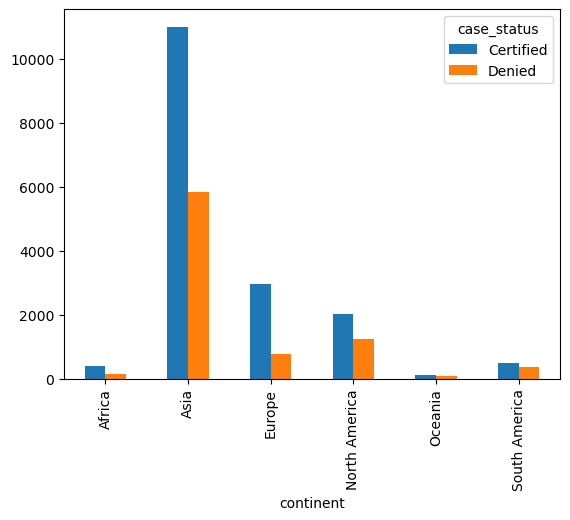

In [14]:
r1.plot(kind='bar')

<Axes: xlabel='continent', ylabel='count'>

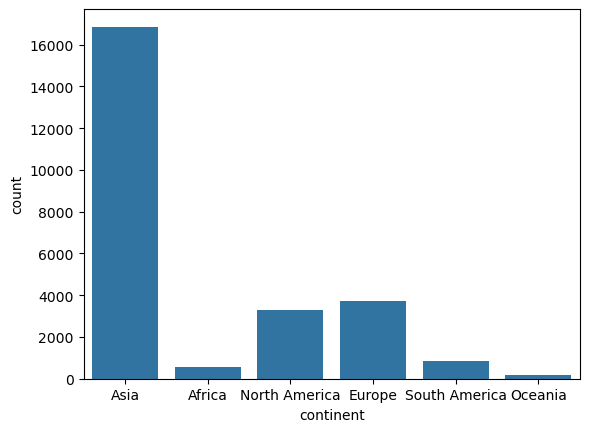

In [15]:
sns.countplot(data=visa_df,
              x='continent')

<Axes: xlabel='continent', ylabel='count'>

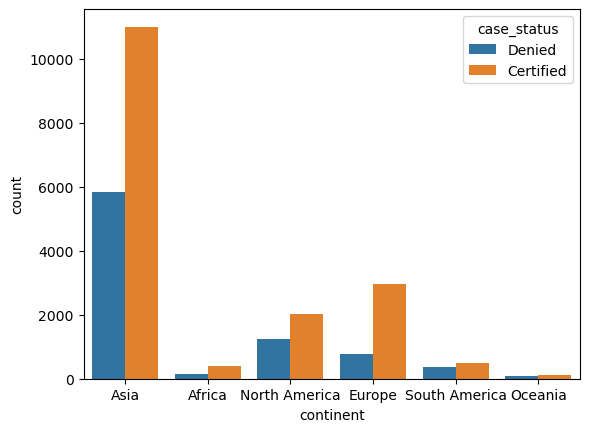

In [16]:
sns.countplot(data=visa_df,
              x='continent',
              hue='case_status')

<Axes: xlabel='continent', ylabel='count'>

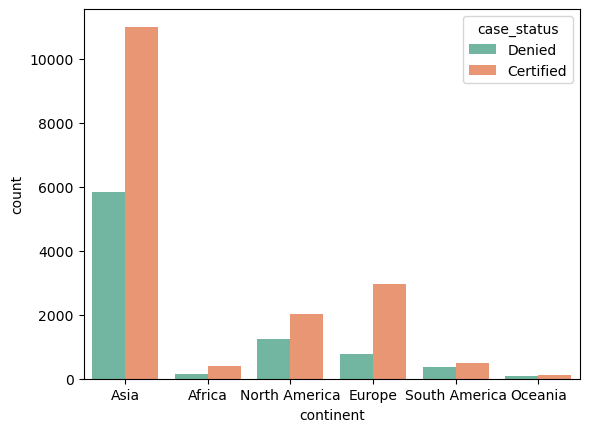

In [17]:
sns.countplot(data=visa_df,
              x='continent',
              hue='case_status',
              palette='Set2',
              width=0.8)

In [18]:
# Scatter plot
# correlation
# heatmaps 

# Streamlit RAG 

# Sunday llma access api key 2hours 9 to 11

In [36]:
id_col=visa_df['continent']
col=visa_df['case_status']
r1=pd.crosstab(id_col,col)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [38]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
id_col=col1
cols=[col2,col3]
pd.crosstab(col1,cols)

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

In [42]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
id_col=col2
cols=[col1,col3]
r2=pd.crosstab(id_col,cols)

<Axes: xlabel='education_of_employee'>

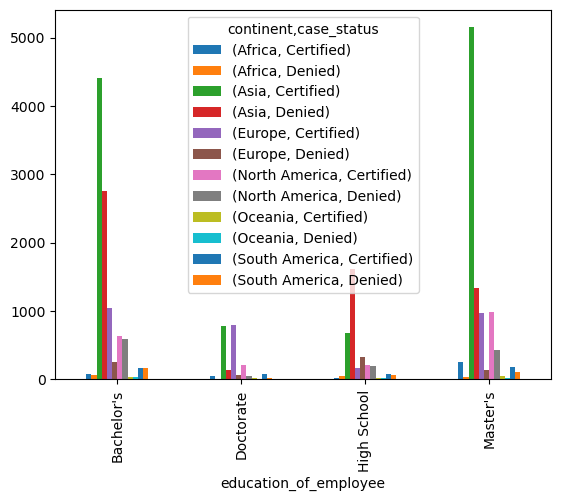

In [44]:
r2.plot(kind='bar')

**Scatter plots**

- bar chart : frequency table

- pie chart : relative frequency table

- histogram : frequency distribution plot

- box plot : Outlier analysis

- scatterplot : Relation between two Numerical columns

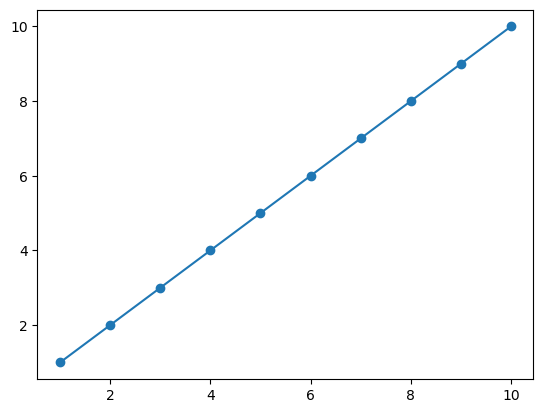

In [52]:
x=list(range(1,11))
y=list(range(1,11))
plt.scatter(x,y)
plt.plot(x,y)

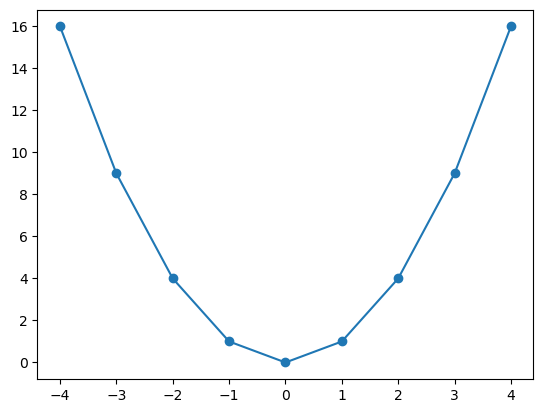

In [54]:
x=list(range(-4,5))
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)

Text(0.5, 1.0, 'no_of_employees and yr_of_estab ')

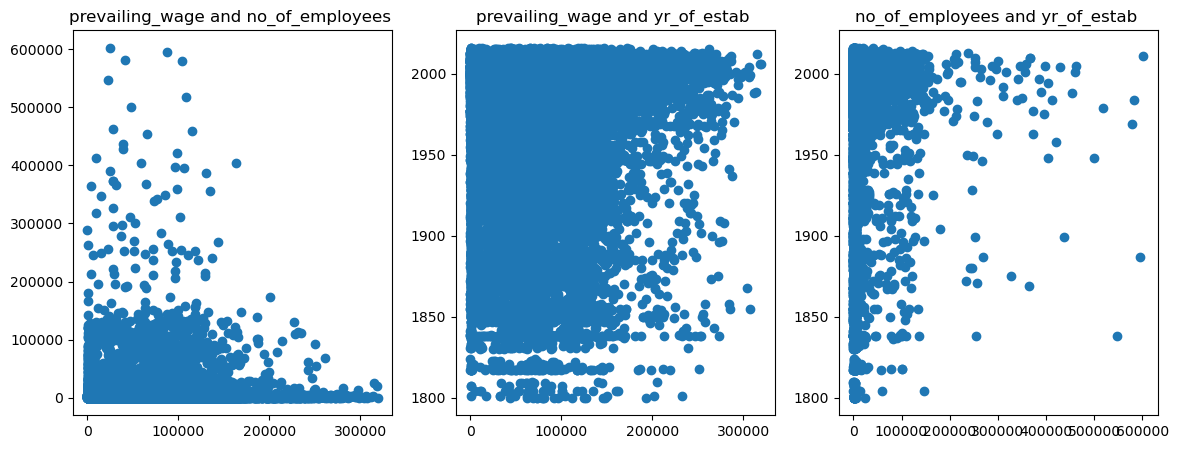

In [60]:
col1=visa_df['prevailing_wage']
col2=visa_df['no_of_employees']
col3=visa_df['yr_of_estab']
plt.figure(figsize=(14,5))
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('prevailing_wage and no_of_employees ')
plt.subplot(1,3,2).scatter(col1,col3)
plt.title('prevailing_wage and yr_of_estab ')
plt.subplot(1,3,3).scatter(col2,col3)
plt.title('no_of_employees and yr_of_estab ')

**Correlation**

In [65]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heatmap**

<Axes: >

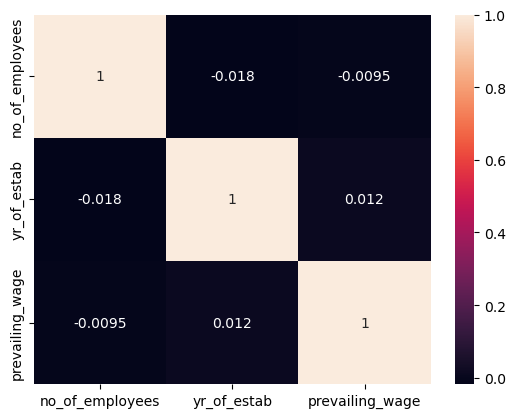

In [70]:
corr=visa_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

In [ ]:
# step-1: Wine quality dataset
# Step-2: apply the correlation : 12x12=144 values
# Step-3: By seeing this 144 human eyes can't identify which high and which low relation so draw heatmap
# Step-4: Get the column pair  high post, high neg,no relation
# Step-5: Draw the scatter plot

In [74]:
file_path=r'C:\Users\omkar\OneDrive\Documents\Gen_AI\Data_files\winequality_red.csv'
wine_df=pd.read_csv(file_path)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [76]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

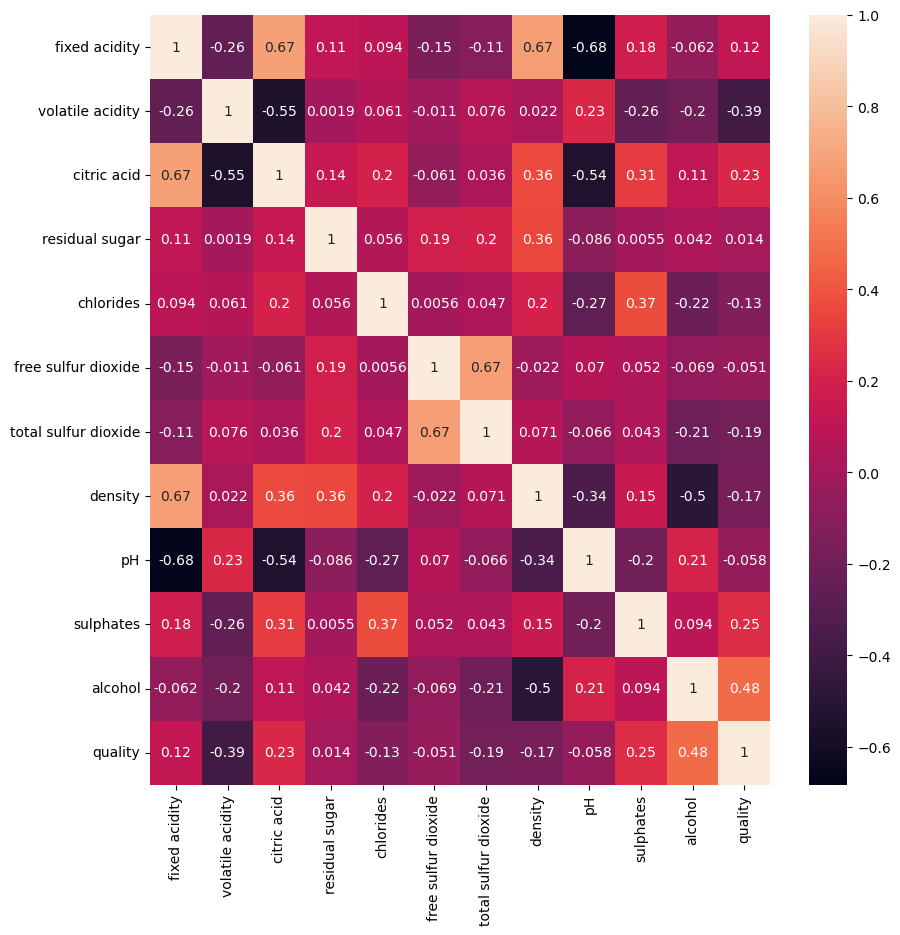

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_df.corr(),annot=True)

In [ ]:
fixed acidity has 67% postive relation with citiric acide and 68% negative ph
no relation with alchol

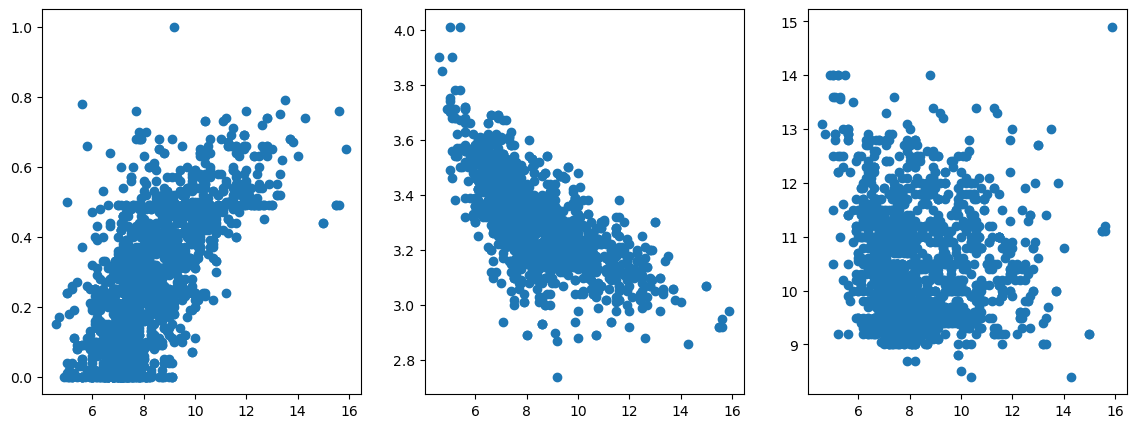

In [84]:
col1=wine_df['fixed acidity']
col2=wine_df['citric acid']
col3=wine_df['pH']
col4=wine_df['alcohol']
plt.figure(figsize=(14,5))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col1,col3)
plt.subplot(1,3,3).scatter(col1,col4)